# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

df = pd.read_csv('who.csv')

In [2]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

#### Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [13]:
# Code
# print(df.columns)
countries = df.country.unique()
years = df.year.unique()
print(f"There are {len(countries)} countries present")
print(f"The timespan of the data is from {min(df.year)} to {max(df.year)}. A total of {len(df.year.unique())} years")
print(f"With {len(countries)} and {len(years)} years of data there should be {len(countries) * len(df.year.unique())} entries. However the dataframe contains {df.shape[0]} rows.")

print(f"The following countries are missing rows for the timespan {min(df.year)} to {max(df.year)}:")
for country in countries:
    length = len(df.year[df.country == country])
#    print(length)
    if length != len(years):
        countryYears = df.year[df.country == country].unique()
        print(f"\n {country} \n Years Listed: {countryYears} \n Years Missing: {list(set(years) - set(countryYears))}")

# df.notnull().sum().value_counts(dropna=False)
# df.year.isnull()



There are 219 countries present
The timespan of the data is from 1980 to 2013. A total of 34 years
With 219 and 34 years of data there should be 7446 entries. However the dataframe contains 7240 rows.
The following countries are missing rows for the timespan 1980 to 2013:

 Bonaire, Saint Eustatius and Saba 
 Years Listed: [2010 2011 2012 2013] 
 Years Missing: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

 Curacao 
 Years Listed: [2010 2011 2012 2013] 
 Years Missing: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

 Montenegro 
 Years Listed: [2005 2006 2007 2008 2009 2010 2011 2012 2013] 
 Years Missing: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1

#### Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
  

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

In [14]:
# Code

dfLong = df.melt(id_vars=['country', 'year'], var_name='method', value_name='numCases')

dfLong.columns

dfLong['age'] = dfLong['method'].apply(lambda x: re.sub("[^0-9]", "", x.split('_')[-1]))
dfLong['gender'] = dfLong['method'].apply(lambda x: re.sub("[^mf]", "", x))


#### Question 3: Create a graph that shows when countries started to report TB cases.

Most countries in this dataset began reording data around 1995


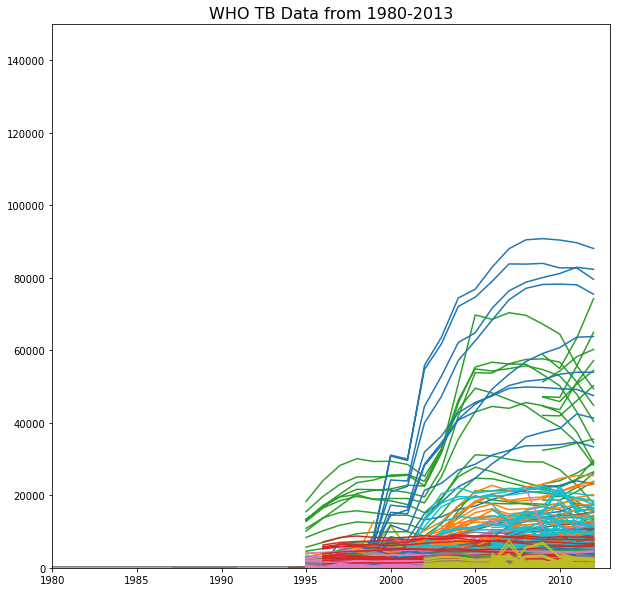

In [15]:
# Code

countries = dfLong.country.unique()
methods = dfLong.method.unique()

plt.figure(figsize=(10,10))
for country in countries:
    plt.plot(dfLong[dfLong.country == country].year, dfLong[dfLong.country == country].numCases, label=country)
plt.title("WHO TB Data from 1980-2013", fontsize=16)
plt.ylim(0, 150000)
plt.xlim(1980, 2013)

print("Most countries in this dataset began reording data around 1995")